# Importing dependencies

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Data collection

In [229]:
car_price = pd.read_csv("CarsData.csv")
car_price.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [230]:
car_price.shape

(97712, 10)

In [231]:
data = car_price.copy()
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


# Data preprocessing

In [232]:
data.shape

(97712, 10)

In [233]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [235]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [236]:
data.duplicated().sum()

0

In [237]:
#changing object dtype to category  to save memory
data['model']=data['model'].astype("category")
data['transmission']=data['transmission'].astype("category")
data['fuelType']=data['fuelType'].astype("category")
data['Manufacturer']=data['Manufacturer'].astype("category")

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         97712 non-null  category
 1   year          97712 non-null  int64   
 2   price         97712 non-null  int64   
 3   transmission  97712 non-null  category
 4   mileage       97712 non-null  int64   
 5   fuelType      97712 non-null  category
 6   tax           97712 non-null  int64   
 7   mpg           97712 non-null  float64 
 8   engineSize    97712 non-null  float64 
 9   Manufacturer  97712 non-null  category
dtypes: category(4), float64(2), int64(4)
memory usage: 4.9 MB


In [239]:
#data.to_csv("cleaned_car_price_prediction_datasets.csv")

# EDA

# Univariate analysis

In [240]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [241]:
model_dict = dict(data["model"].value_counts())
x = list(model_dict.keys())
height = list(model_dict.values())
fig = go.Figure([go.Bar(x=x, y=height)],)
fig.show()

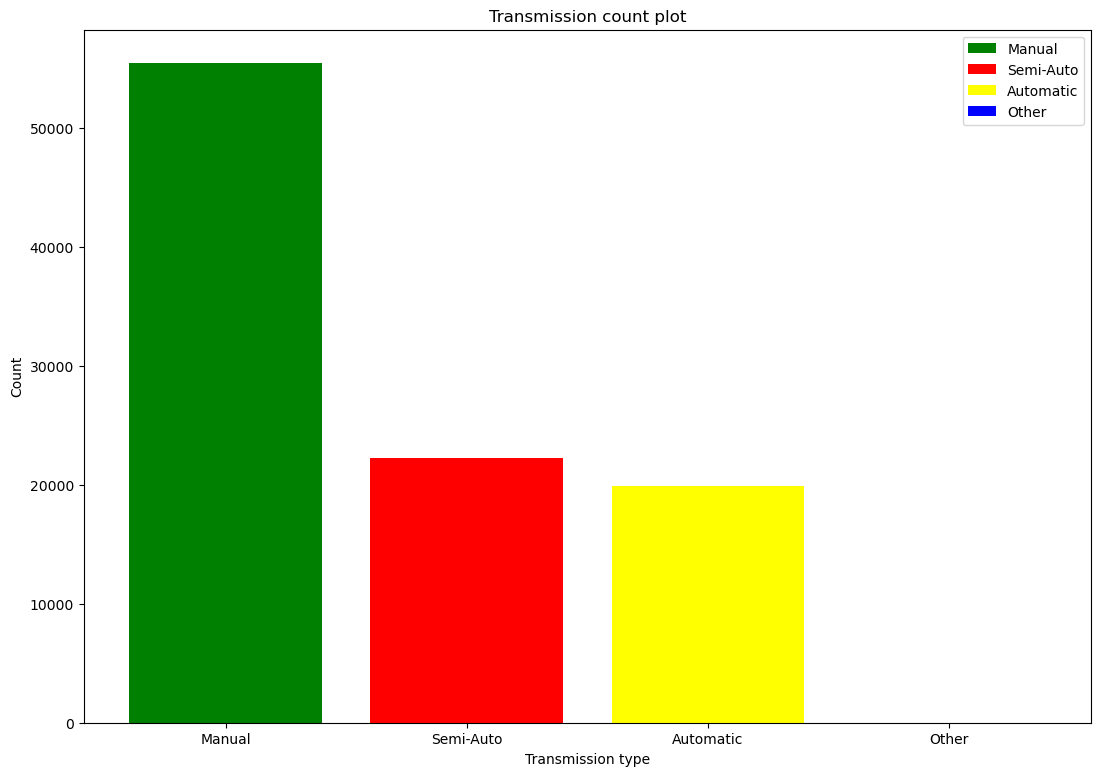

In [242]:
plt.figure(figsize=(13,9))
model_dict = dict(data["transmission"].value_counts())
x = list(model_dict.keys())
height = list(model_dict.values())

plt.bar(x=x,height=height,width=.8,color=["green","red","yellow","blue"],label=x)
plt.title("Transmission count plot")
plt.xlabel("Transmission type")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## -The count of manual and other transmission types are high and low respectively.

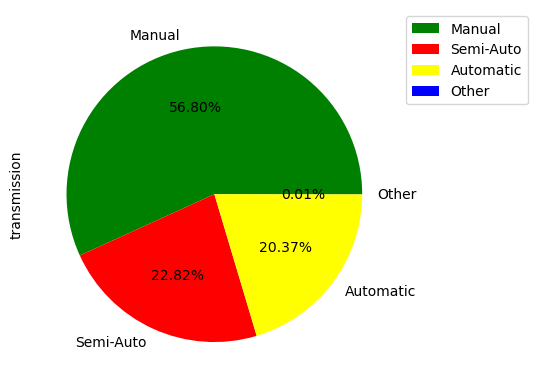

In [243]:
c = ["green","red","yellow","blue"]
pct = "%.2f%%"

data["transmission"].value_counts().plot(kind="pie",autopct=pct,colors=c)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

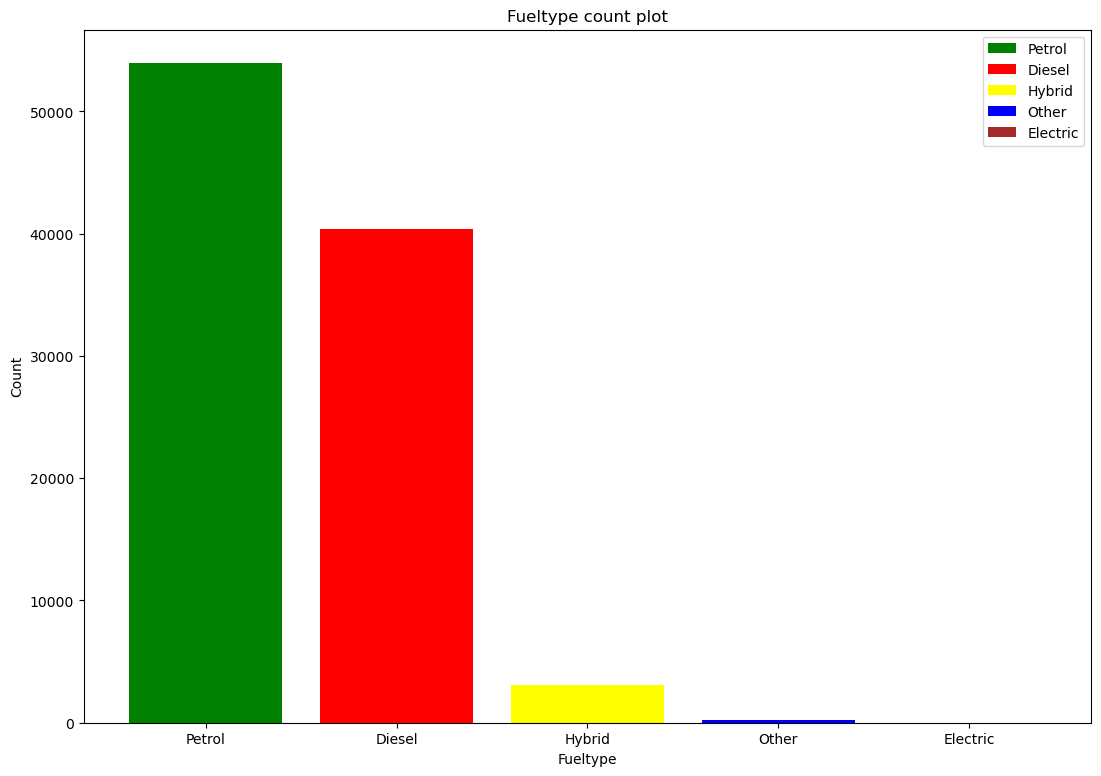

In [244]:
plt.figure(figsize=(13,9))
model_dict = dict(data["fuelType"].value_counts())
x = list(model_dict.keys())
height = list(model_dict.values())

plt.bar(x=x,height=height,width=.8,color=["green","red","yellow","blue","brown"],label=x)
plt.title("Fueltype count plot")
plt.xlabel("Fueltype")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [245]:
model_dict = dict(data["fuelType"].value_counts())
labels = list(model_dict.keys())
values = list(model_dict.values())

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

## -The count of petrol and electric fueltype are high and low respectively.

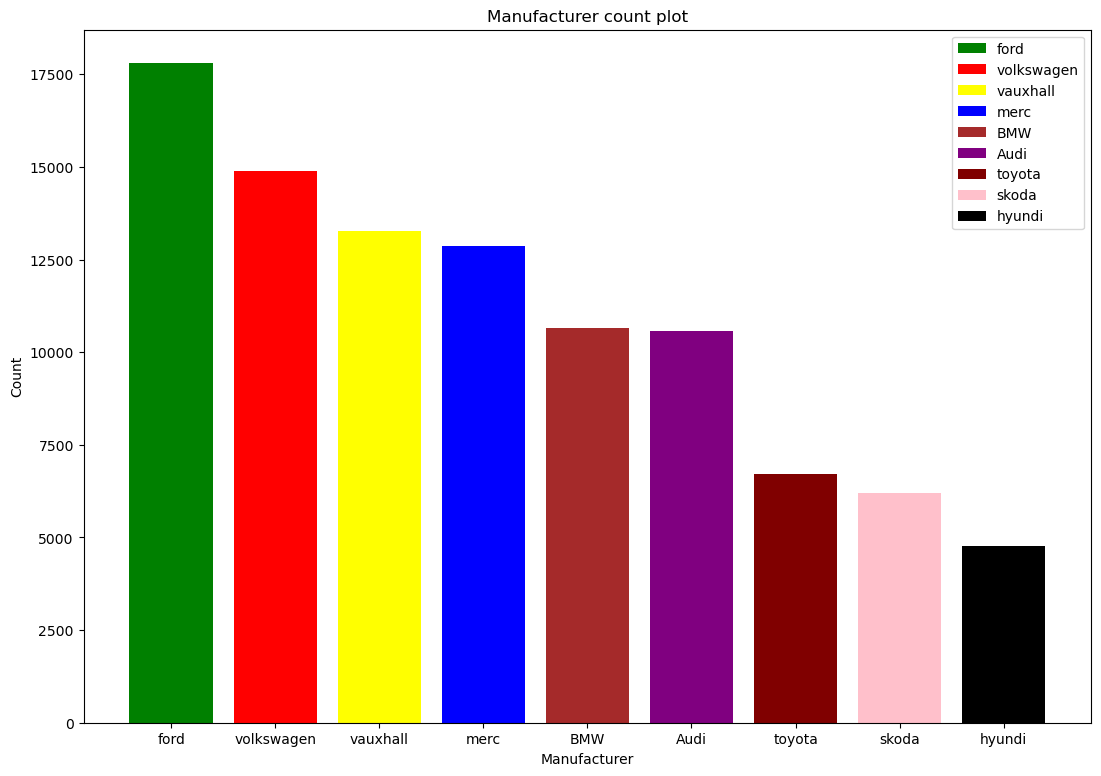

In [246]:
plt.figure(figsize=(13,9))
model_dict = dict(data["Manufacturer"].value_counts())
x = list(model_dict.keys())
height = list(model_dict.values())
c = ["green","red","yellow","blue","brown","purple","maroon","pink","black"]

plt.bar(x=x,height=height,width=.8,color=c,label=x)
plt.title("Manufacturer count plot")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [247]:
model_dict = dict(data["Manufacturer"].value_counts())
labels = list(model_dict.keys())
values = list(model_dict.values())

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

## -The count of ford is high and hyundi manufacturer is low.

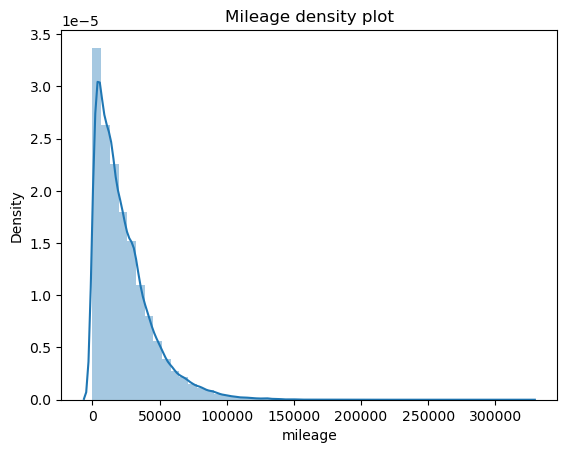

In [248]:
sns.distplot(data["mileage"]).set(title="Mileage density plot")
plt.show()

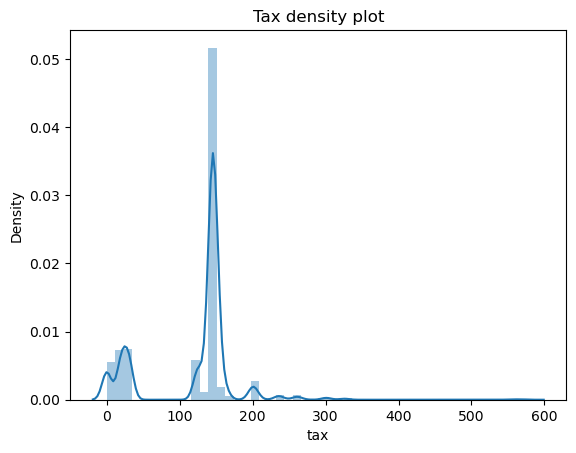

In [249]:
sns.distplot(data["tax"]).set(title="Tax density plot")
plt.show()

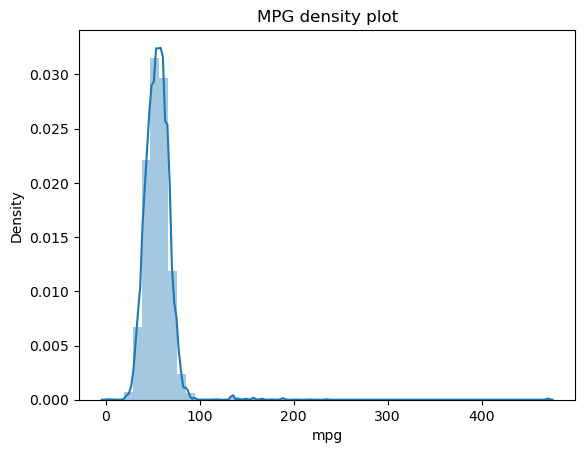

In [250]:
sns.distplot(data["mpg"]).set(title="MPG density plot")
plt.show()

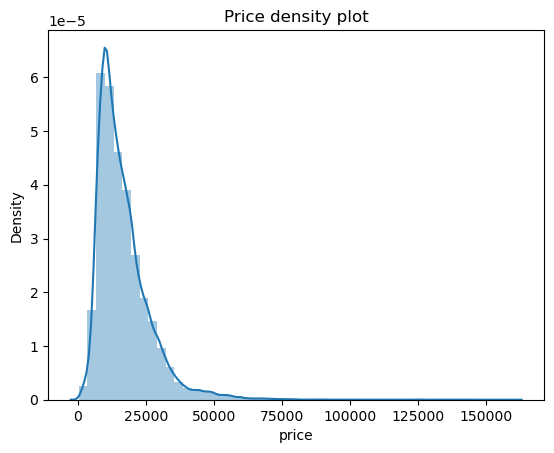

In [251]:
sns.distplot(data["price"]).set(title="Price density plot")
plt.show()

# Bivariate analysis

In [252]:
# # Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

In [253]:
correl = data.corr()
correl

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.492491,-0.739664,0.192058,-0.130547,-0.035639
price,0.492491,1.000000,-0.417996,0.307003,-0.295507,0.639356
mileage,-0.739664,-0.417996,1.000000,-0.215558,0.183070,0.107299
tax,0.192058,0.307003,-0.215558,1.000000,-0.451370,0.280770
mpg,-0.130547,-0.295507,0.183070,-0.451370,1.000000,-0.249346
engineSize,-0.035639,0.639356,0.107299,0.280770,-0.249346,1.000000


# Heatmap plot

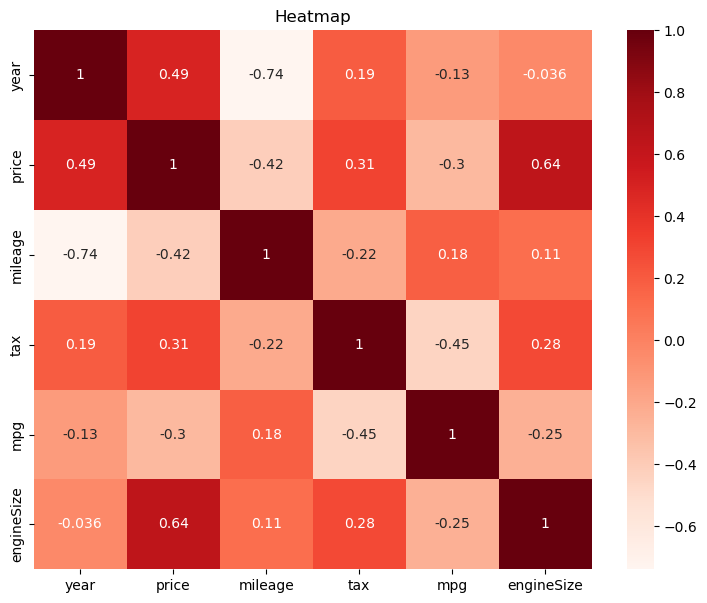

In [254]:
plt.figure(figsize=(9,7))
sns.heatmap(correl,annot=True,cmap="Reds")
plt.title("Heatmap")
plt.show()

<Figure size 500x500 with 0 Axes>

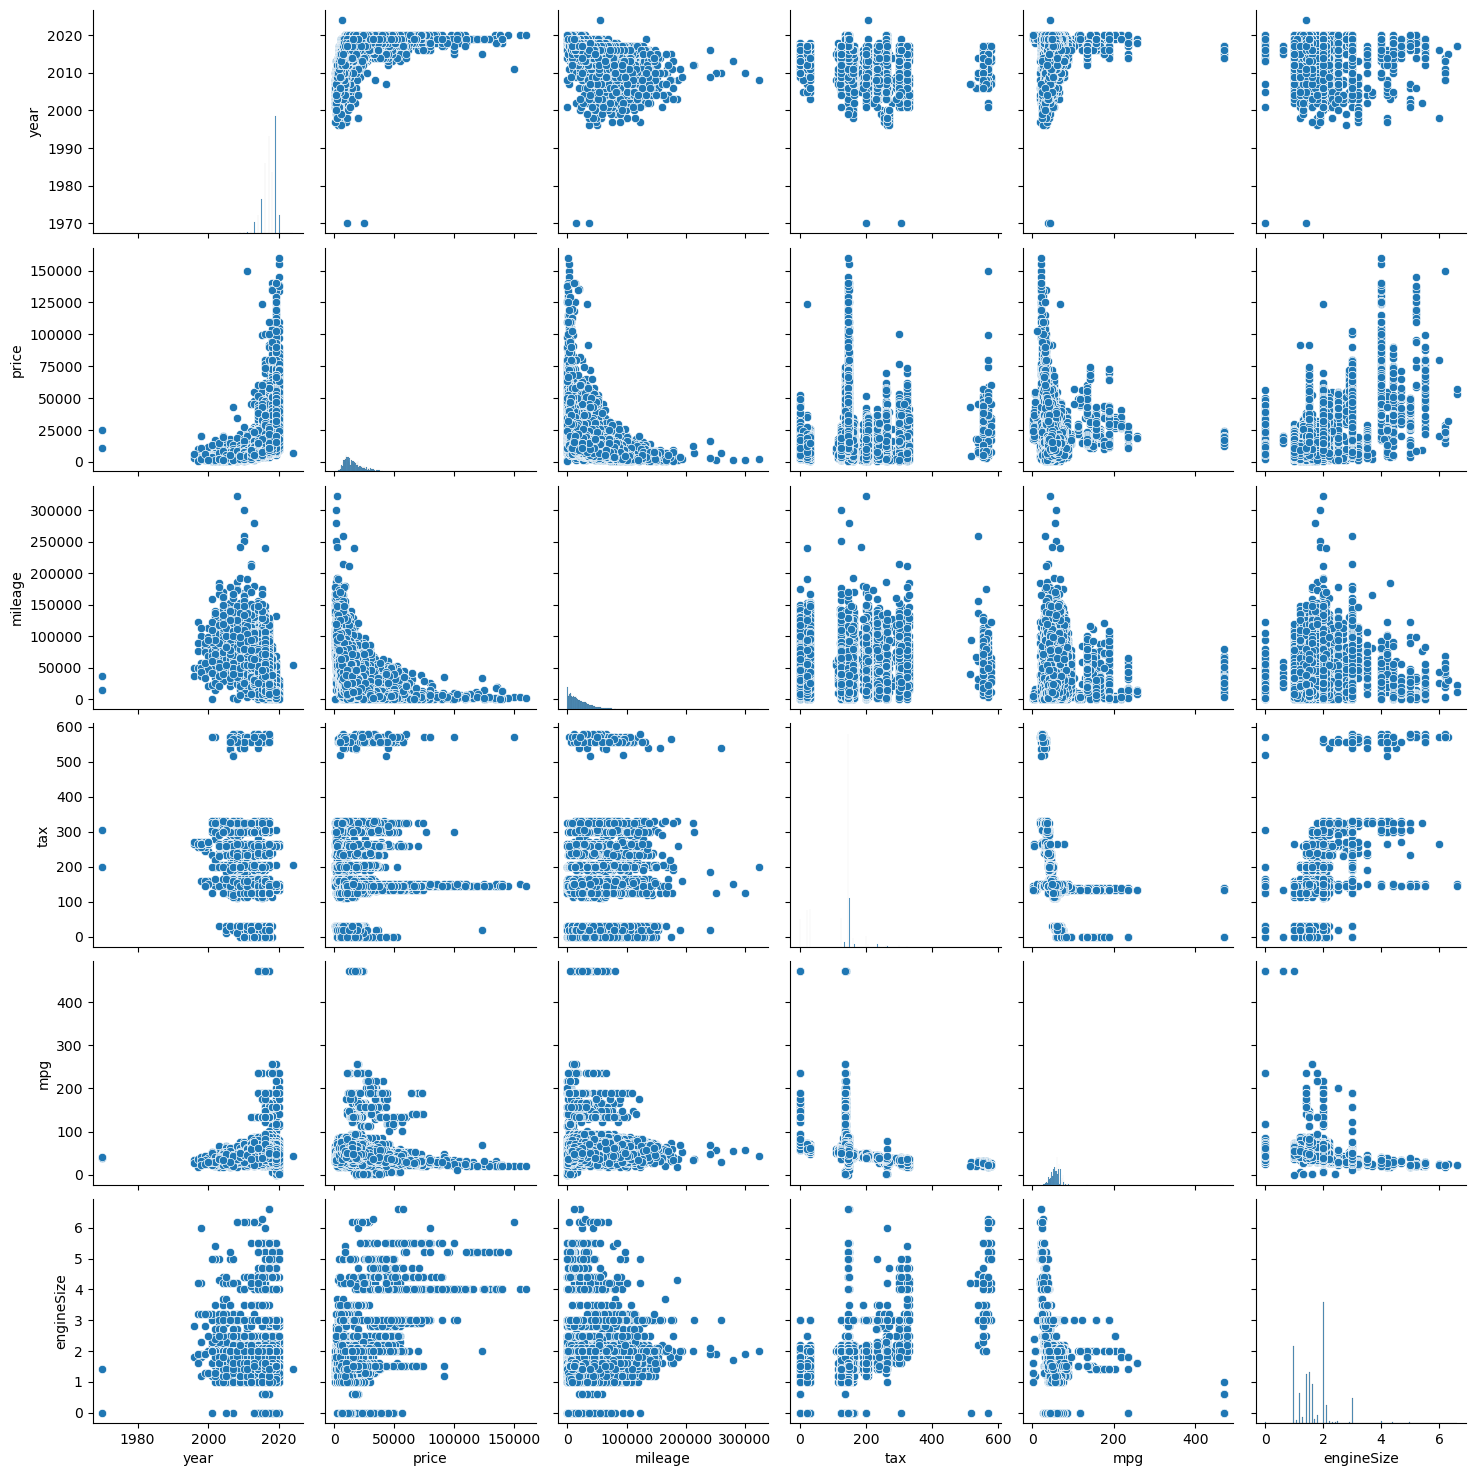

In [255]:
plt.figure(figsize=(5,5))
sns.pairplot(data=data)
plt.show()

In [256]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


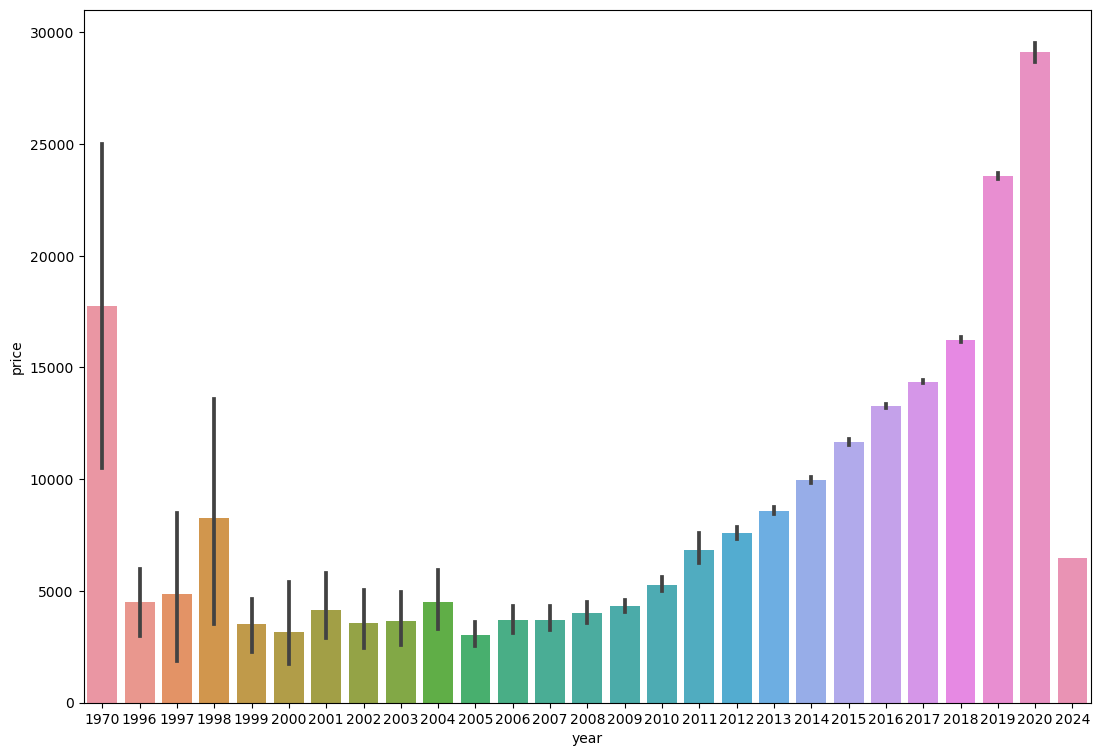

In [257]:
plt.figure(figsize=(13,9))
sns.barplot(x=data["year"],y=data["price"])
plt.show()

## -Price is increasing as the year increases.

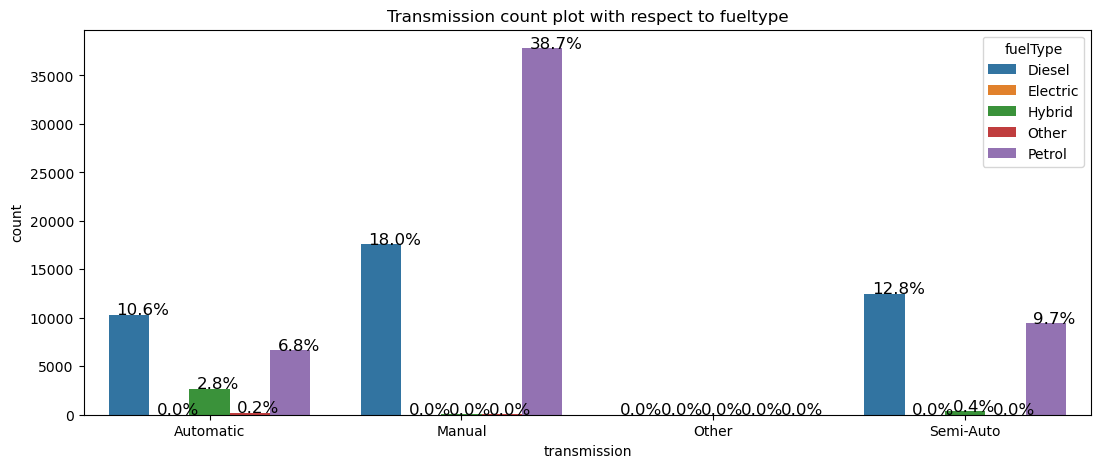

In [258]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='transmission',hue=data['fuelType'],data=data)
plt.title("Transmission count plot with respect to fueltype")
bar_perc(ax,data['transmission'])

## -Manual transmission type with petrol fueltype is high.

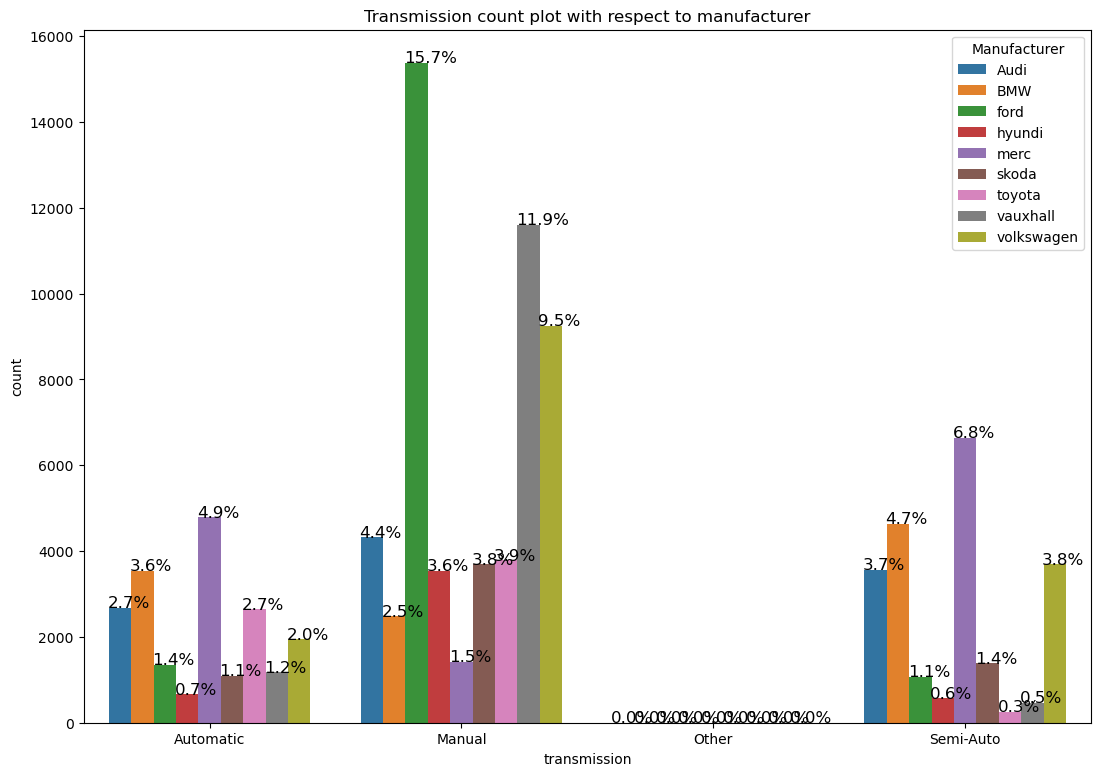

In [259]:
plt.figure(figsize=(13,9))
ax=sns.countplot(x=data['transmission'],hue=data['Manufacturer'],data=data)
plt.title("Transmission count plot with respect to manufacturer")
bar_perc(ax,data['transmission'])

## -Manual transmission type with ford manufacturer is high. 

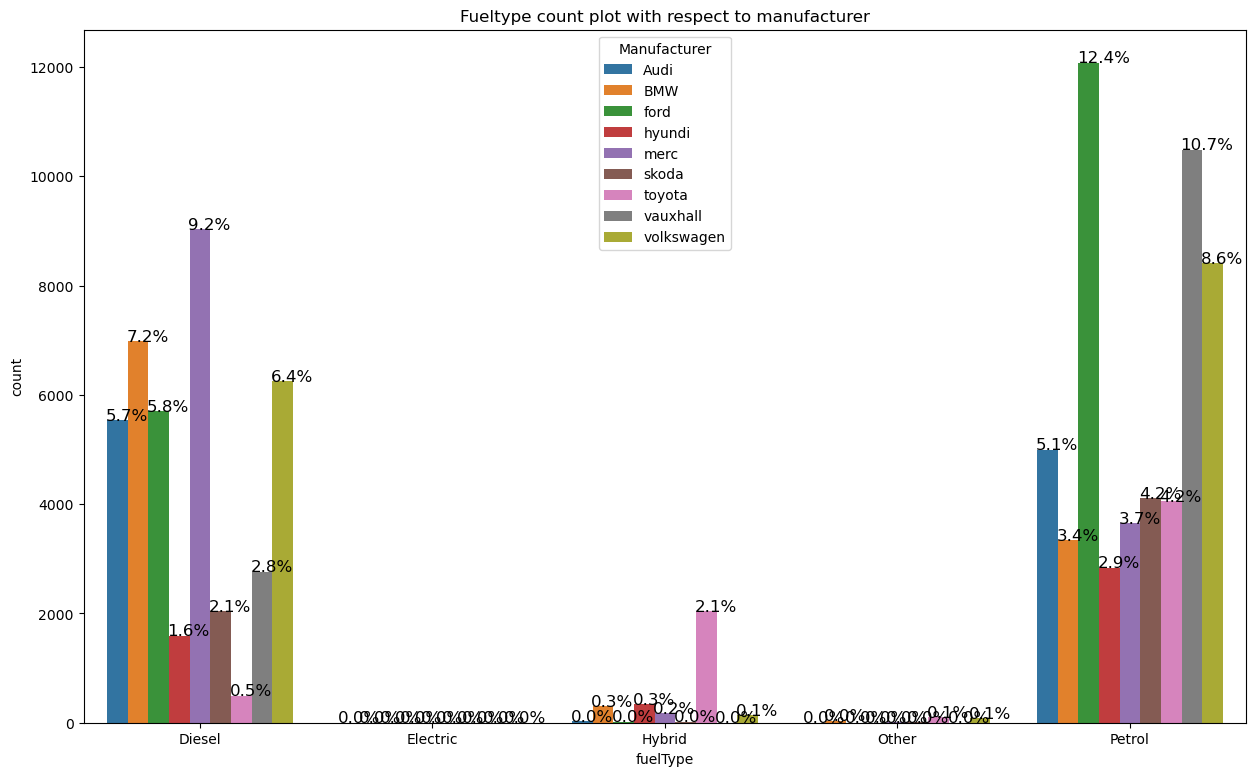

In [260]:
plt.figure(figsize=(15,9))
ax=sns.countplot(x=data['fuelType'],hue=data['Manufacturer'],data=data)
plt.title("Fueltype count plot with respect to manufacturer")
bar_perc(ax,data['fuelType'])

## -petrol fueltype with ford manufacturer is high.

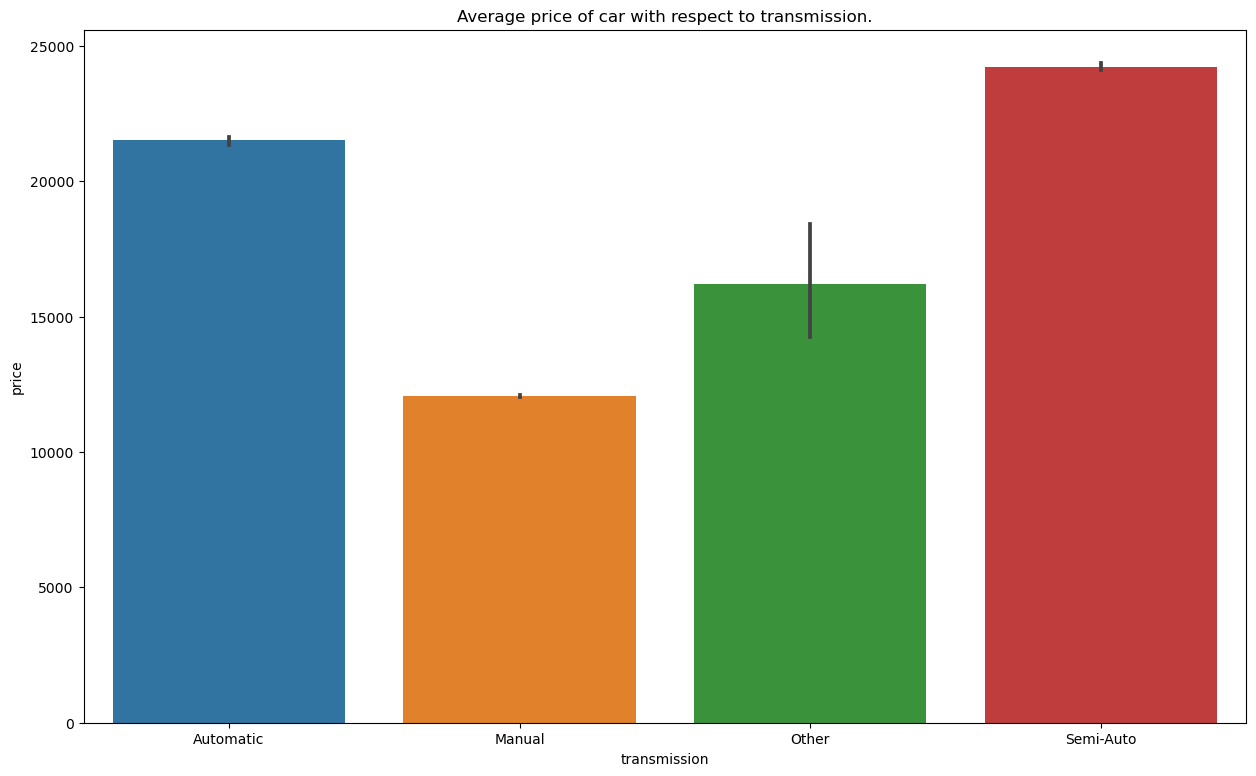

In [261]:
plt.figure(figsize=(15,9))
sns.barplot(x=data.transmission,y=data.price).set(title="Average price of car with respect to transmission.")
plt.show()

## -Average price of semi-auto car is high and manual is low.

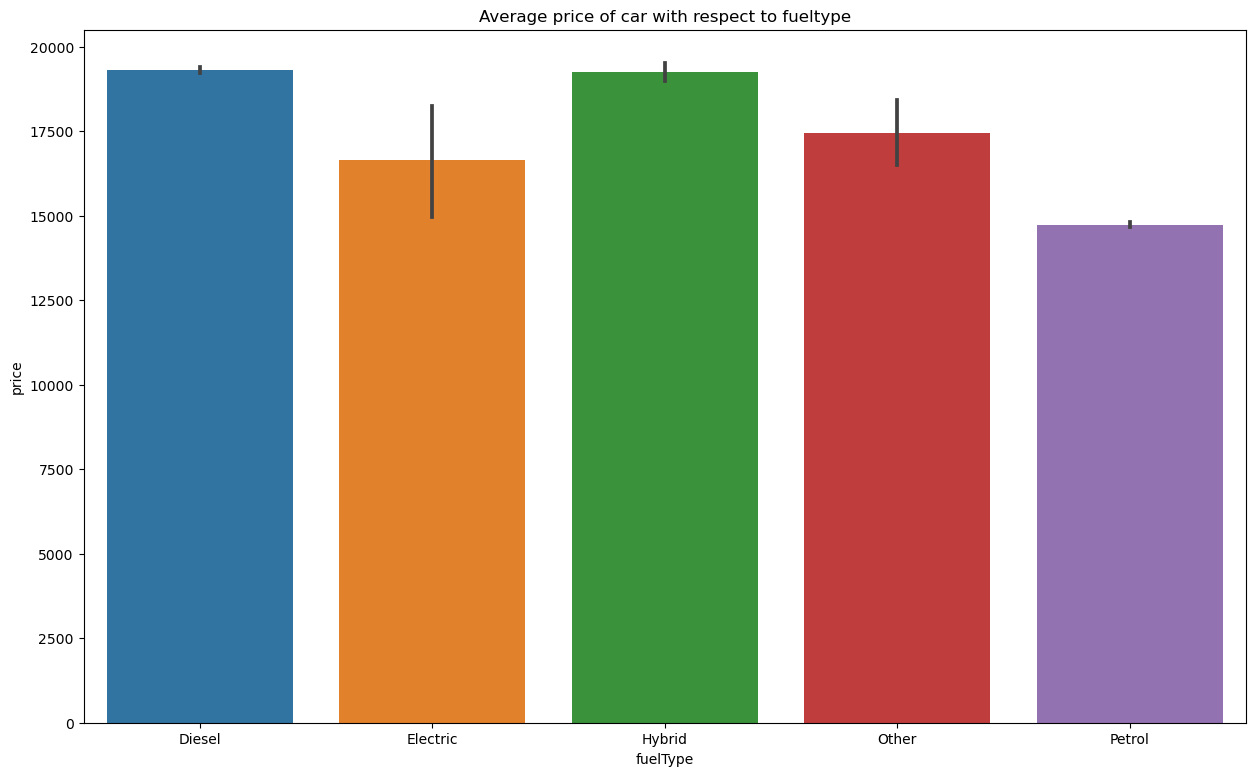

In [262]:
plt.figure(figsize=(15,9))
sns.barplot(x=data.fuelType,y=data.price).set(title="Average price of car with respect to fueltype")
plt.show()

## -Average price of diesel fueltype is high and petrol fueltype is low.

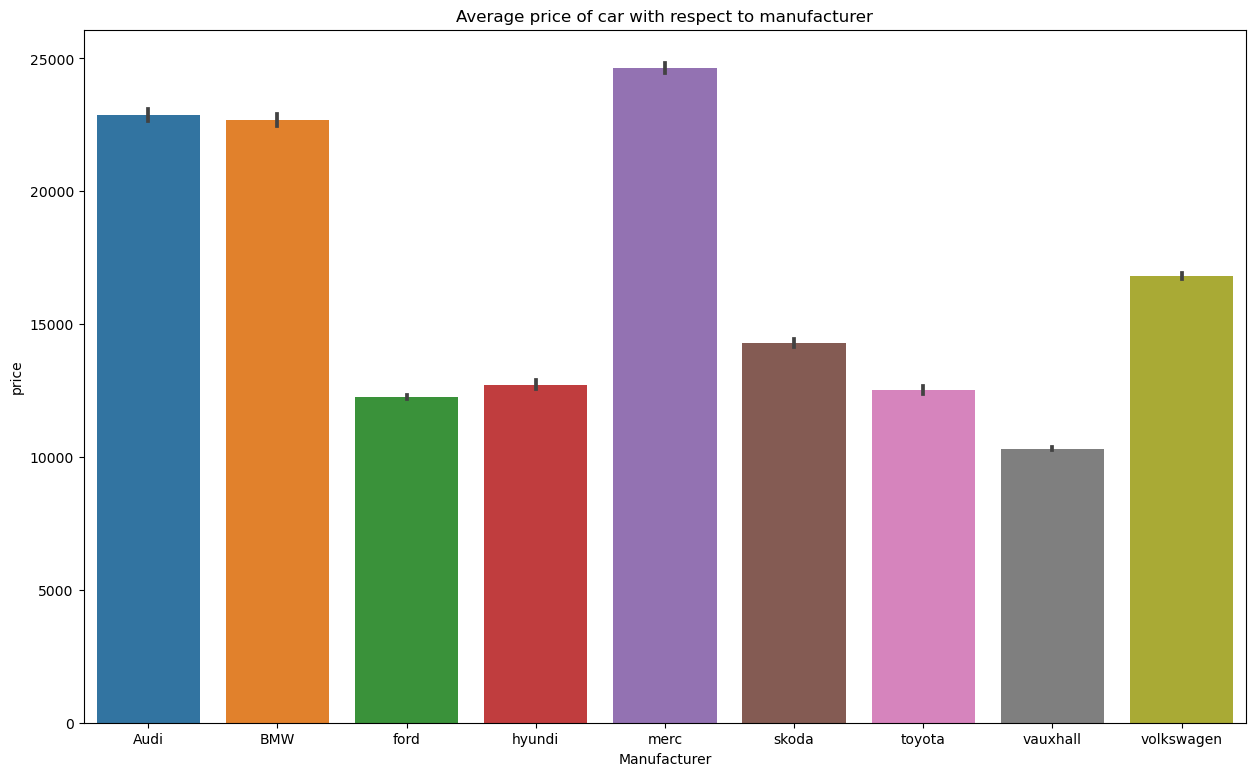

In [263]:
plt.figure(figsize=(15,9))
sns.barplot(x=data.Manufacturer,y=data.price).set(title="Average price of car with respect to manufacturer")
plt.show()

## -Average price of merc is high and vauxhall is low.

In [264]:
data.groupby(data["transmission"]).price.mean()

transmission
Automatic    21512.202512
Manual       12076.615635
Other        16219.111111
Semi-Auto    24235.214029
Name: price, dtype: float64

In [265]:
data.groupby(data["fuelType"]).price.mean()

fuelType
Diesel      19306.870704
Electric    16645.333333
Hybrid      19252.851585
Other       17458.768293
Petrol      14733.011133
Name: price, dtype: float64

In [266]:
data.groupby(data["Manufacturer"]).price.mean()

Manufacturer
Audi          22853.956081
BMW           22692.888691
ford          12269.779238
hyundi        12727.809384
merc          24636.426361
skoda         14284.802683
toyota        12529.799074
vauxhall      10314.259541
volkswagen    16807.898073
Name: price, dtype: float64

# Multivariate

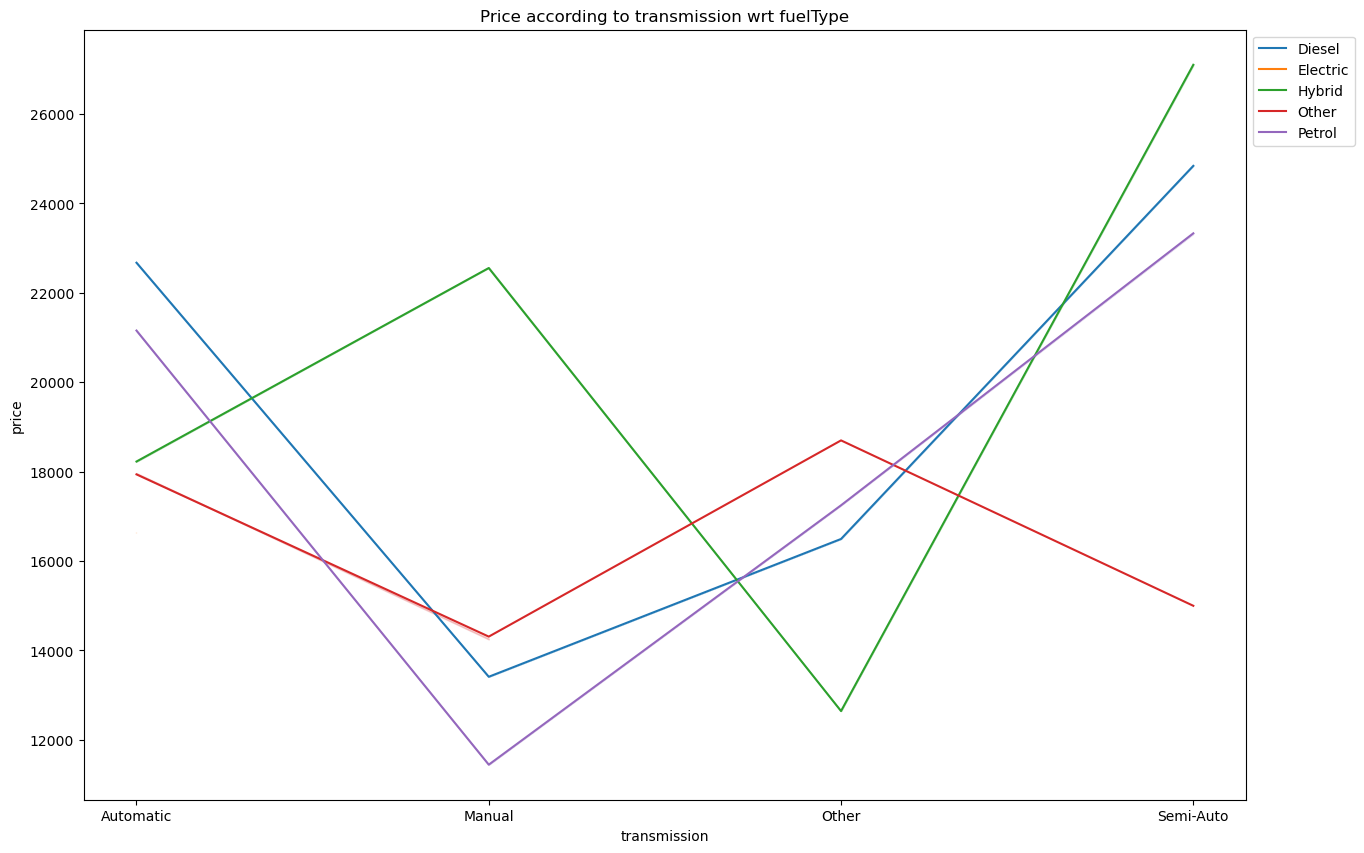

In [267]:
plt.figure(figsize=(15,10))
sns.lineplot(x=data["transmission"],y=data["price"],hue=data["fuelType"],ci=1).set(title="Price according to transmission wrt fuelType")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

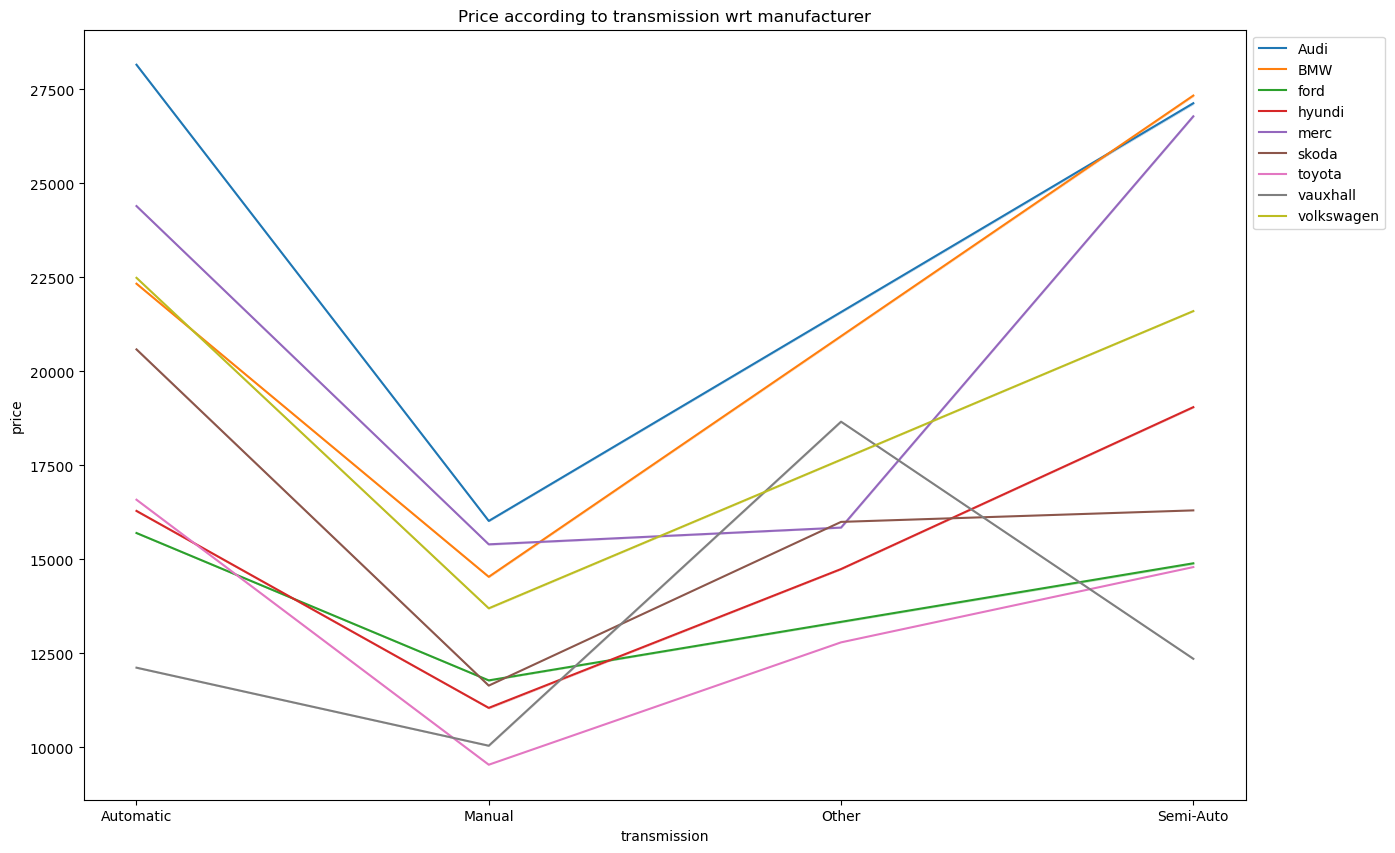

In [268]:
plt.figure(figsize=(15,10))
sns.lineplot(x=data["transmission"],y=data["price"],hue=data["Manufacturer"],ci=1).set(title="Price according to transmission wrt manufacturer")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [269]:
Trans_fueltype_price = pd.crosstab(index=data["transmission"],columns=data["fuelType"],values=data.price,aggfunc="mean")
Trans_fueltype_price

fuelType,Diesel,Electric,Hybrid,Other,Petrol
transmission,,,,,
Automatic,22674.644401,16645.333333,18227.435850,17939.731132,21157.379021
Manual,13412.020833,NaN,22556.192308,14310.437500,11445.642566
Other,16495.000000,NaN,12645.000000,18700.000000,17248.000000
Semi-Auto,24841.927038,NaN,27102.769006,15000.000000,23332.405620


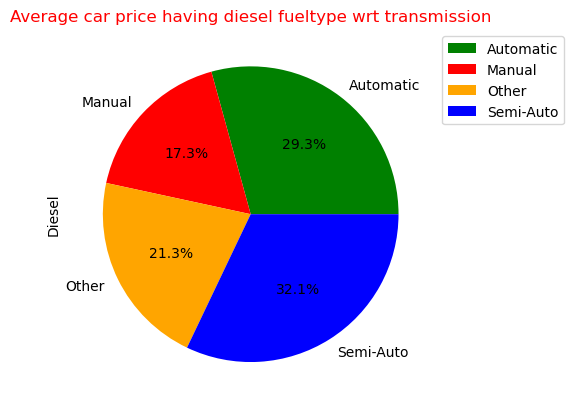

In [270]:
Trans_fueltype_price["Diesel"].plot(kind="pie",colors=["g","r","orange","blue"],autopct="%.1f%%")
plt.title("Average car price having diesel fueltype wrt transmission",color="red")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## - The average price of semi-auto transmission and of diesel fueltype car is high.

## - The average price of manual transmission and of diesel fueltype car is low.

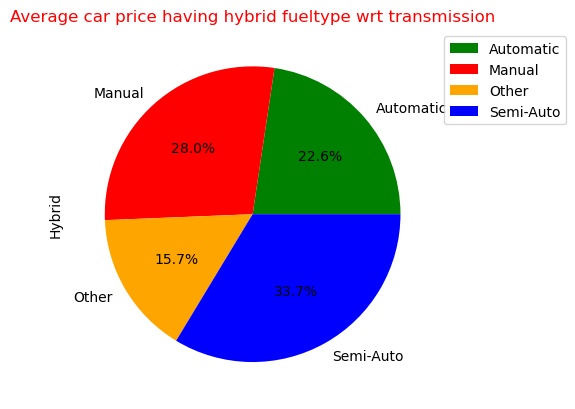

In [271]:
Trans_fueltype_price["Hybrid"].plot(kind="pie",colors=["g","r","orange","blue"],autopct="%.1f%%")
plt.title("Average car price having hybrid fueltype wrt transmission",color="red")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## - The average price of semi-auto transmission and of hybrid fueltype car is high.
## - The average price of other transmission and of hybrid fueltype car is low.

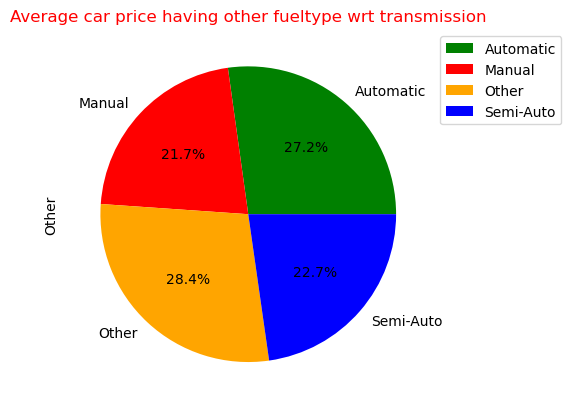

In [272]:
Trans_fueltype_price["Other"].plot(kind="pie",colors=["g","r","orange","blue"],autopct="%.1f%%")
plt.title("Average car price having other fueltype wrt transmission",color="red")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## - The average price of other transmission and of other fueltype car is high.
## - The average price of manual transmission and of other fueltype car is low.

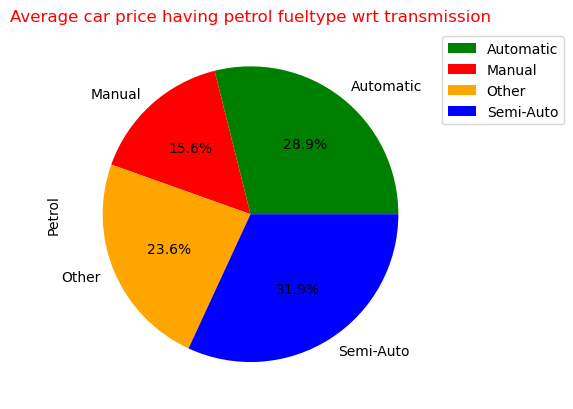

In [273]:
Trans_fueltype_price["Petrol"].plot(kind="pie",colors=["g","r","orange","blue"],autopct="%.1f%%")
plt.title("Average car price having petrol fueltype wrt transmission",color="red")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## - The average price of semi-auto transmission and of petrol fueltype car is high.
## - The average price of manual transmission and of petrol fueltype car is high.

In [274]:
Trans_manuf_price = pd.crosstab(index=data["Manufacturer"],columns=data["transmission"],values=data.price,aggfunc="mean")
Trans_manuf_price

transmission,Automatic,Manual,Other,Semi-Auto
Manufacturer,,,,
Audi,28157.134328,16024.305305,NaN,27133.968610
BMW,22333.308865,14538.580684,NaN,27337.505284
ford,15703.494830,11783.850150,NaN,14897.974884
hyundi,16291.203647,11052.676537,14745.000000,19050.473592
merc,24398.611424,15402.434507,15847.500000,26785.296190
skoda,20585.770909,11645.006770,15999.000000,16304.879484
toyota,16588.761222,9541.009755,12795.000000,14797.137795
vauxhall,12122.051651,10046.488114,18664.333333,12359.030172
volkswagen,22489.758496,13700.713483,NaN,21605.172124


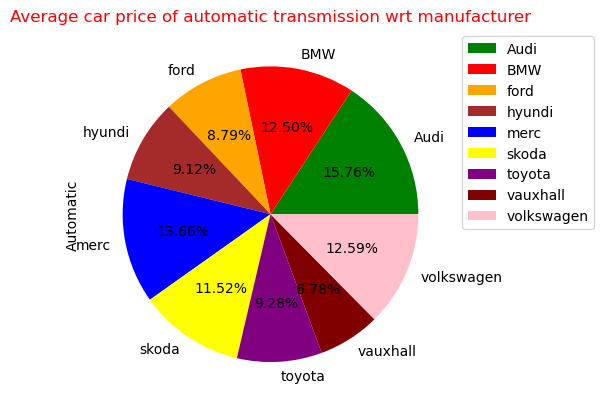

In [275]:
c = ["green","red","orange","brown","blue","yellow","purple","maroon","pink"]
pct = "%.2f%%"
Trans_manuf_price["Automatic"].plot(kind="pie",colors=c,autopct=pct)
plt.title("Average car price of automatic transmission wrt manufacturer",color="red")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

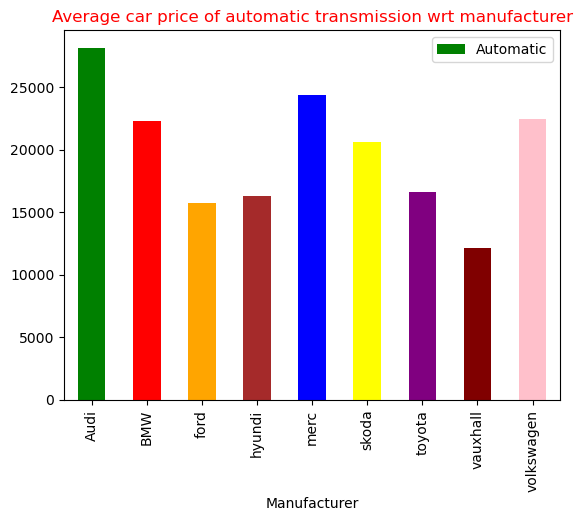

In [276]:
c = ["green","red","orange","brown","blue","yellow","purple","maroon","pink"]

Trans_manuf_price["Automatic"].plot(kind="bar",color=c)
plt.title("Average car price of automatic transmission wrt manufacturer",color="red")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## -The average price of Audi with automatic transmission is high.
## -The average price of Vauxhall with automatic transmission is low.

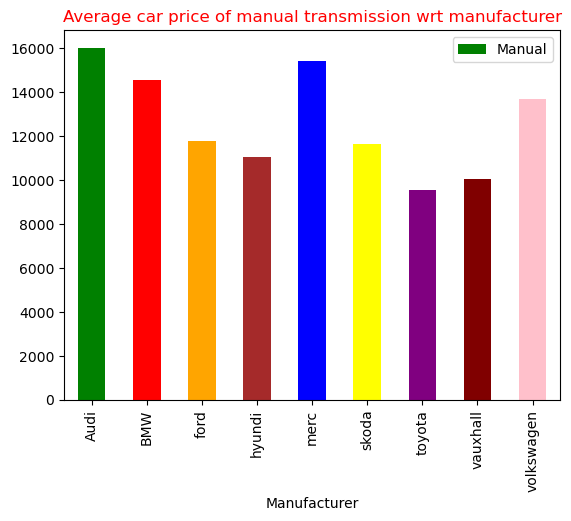

In [277]:
c = ["green","red","orange","brown","blue","yellow","purple","maroon","pink"]

Trans_manuf_price["Manual"].plot(kind="bar",color=c)
plt.title("Average car price of manual transmission wrt manufacturer",color="red")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

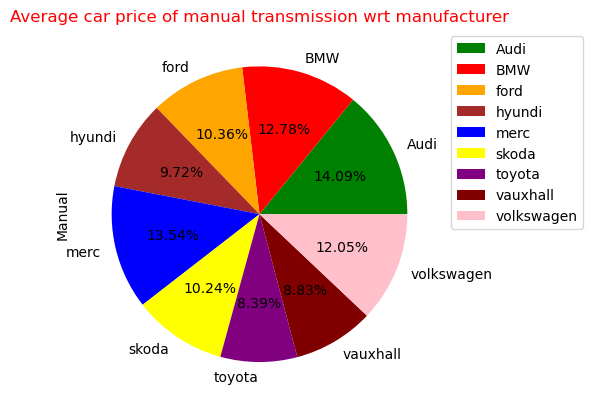

In [278]:
c = ["green","red","orange","brown","blue","yellow","purple","maroon","pink"]
pct = "%.2f%%"
Trans_manuf_price["Manual"].plot(kind="pie",colors=c,autopct=pct)
plt.title("Average car price of manual transmission wrt manufacturer",color="red")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## -The average price of Audi with manual transmission is high.
## -The average price of toyota with manual transmission is low. 

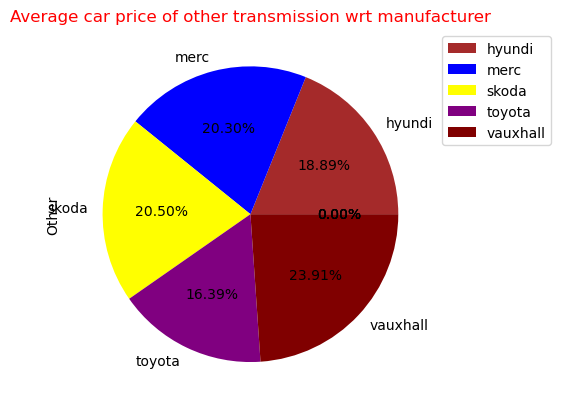

In [279]:
c = ["green","red","orange","brown","blue","yellow","purple","maroon","pink"]
pct = "%.2f%%"
Trans_manuf_price["Other"].plot(kind="pie",colors=c,autopct=pct)
plt.title("Average car price of other transmission wrt manufacturer",color="red")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

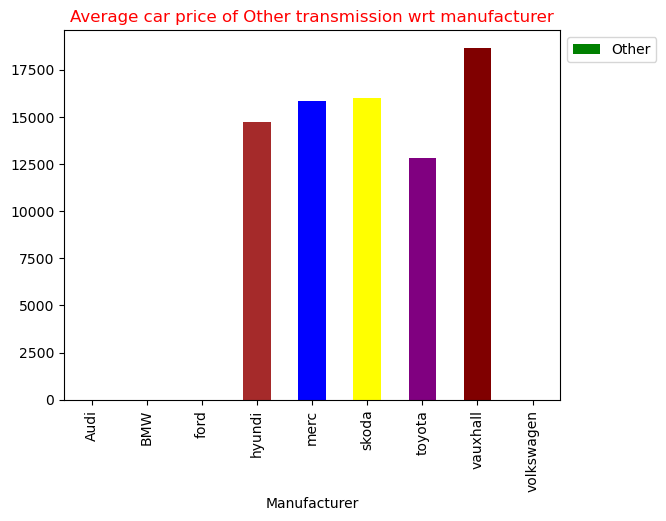

In [280]:
c = ["green","red","orange","brown","blue","yellow","purple","maroon","pink"]

Trans_manuf_price["Other"].plot(kind="bar",color=c)
plt.title("Average car price of Other transmission wrt manufacturer",color="red")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## -The average price of vauxhall with other transmission is high.
## -The average price of toyota with other transmission is low. 

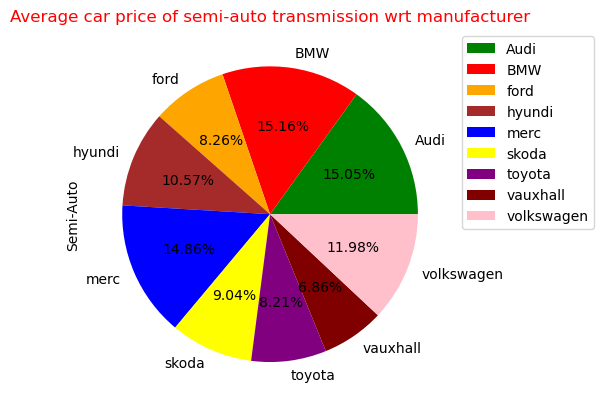

In [281]:
c = ["green","red","orange","brown","blue","yellow","purple","maroon","pink"]
pct = "%.2f%%"
Trans_manuf_price["Semi-Auto"].plot(kind="pie",colors=c,autopct=pct)
plt.title("Average car price of semi-auto transmission wrt manufacturer",color="red")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

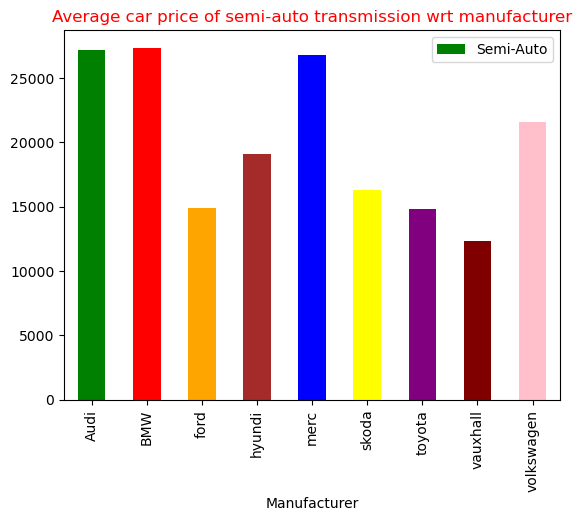

In [282]:
c = ["green","red","orange","brown","blue","yellow","purple","maroon","pink"]

Trans_manuf_price["Semi-Auto"].plot(kind="bar",color=c)
plt.title("Average car price of semi-auto transmission wrt manufacturer",color="red")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## -The average price of BMW with semi-auto transmission is high.
## -The average price of vauxhall with other transmission is low. 

In [283]:
manuf_fueltype_price = pd.crosstab(index=data["Manufacturer"],columns=data["fuelType"],values=data["price"],aggfunc="mean")
manuf_fueltype_price

fuelType,Diesel,Electric,Hybrid,Other,Petrol
Manufacturer,,,,,
Audi,23198.206249,NaN,30191.750000,NaN,22431.641800
BMW,21749.448769,18466.0,27154.966330,18193.861111,24322.279940
ford,13642.600946,15737.5,22149.090909,13800.000000,11602.632616
hyundi,14586.749216,NaN,19101.479412,12800.000000,10919.448203
merc,23216.531658,NaN,22836.547059,21991.285714,28240.653330
skoda,16291.480938,NaN,31225.944444,14957.777778,13211.495018
toyota,15740.163306,NaN,17187.811765,14121.161905,9754.594628
vauxhall,11071.744758,12999.0,10947.500000,5200.000000,10114.598875
volkswagen,18767.902896,NaN,24457.640845,21358.104651,15176.144878


# Creating class for data visualization bar and donut chart

In [284]:
class bar_pie_plot:
    def __init__(self,df):
        self.df = df
        
    
    def pie_plot(self,col):
        mfp_dict = dict(self.df[col])

        labels = list(mfp_dict.keys())
        values = list(mfp_dict.values())
        fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
        fig.show()
        
        
    def bar_plot(self,col):
        per_list = []
        

        mfp_dict = dict(self.df[col])

        labels = list(mfp_dict.keys())
        values = list(mfp_dict.values())
        total = sum(values)
        
        for value in mfp_dict.values():
            per = str(round((value/total)*100,3)) + "%"
            per_list.append(per)

        fig = go.Figure([go.Bar(x=labels, y=values,text=per_list,)])
        fig.show()
        


In [285]:
obj = bar_pie_plot(manuf_fueltype_price,)

obj.pie_plot("Diesel")
obj.bar_plot("Diesel")

## -The average price of merc with diesel fueltype is high.
## -The average price of vauxhall with disel fueltype is low. 

In [286]:
obj.pie_plot("Electric")
obj.bar_plot("Electric")

## -The average price of BMW with electric fueltype is high.
## -The average price of vauxhall with electric fueltype is low. 

In [287]:
obj.pie_plot("Hybrid")
obj.bar_plot("Hybrid")

## -The average price of skoda with hybrid fueltype is high.
## -The average price of vauxhall with hybrid fueltype is low. 

In [288]:
obj.pie_plot("Other")
obj.bar_plot("Other")

## -The average price of merc and vauxhall with other fueltype is high and low respectively.

In [289]:
obj.pie_plot("Petrol")
obj.bar_plot("Petrol")

## -The average price of merc and toyota with petrol fueltype is high and low respectively.

# Feature engineering

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         97712 non-null  category
 1   year          97712 non-null  int64   
 2   price         97712 non-null  int64   
 3   transmission  97712 non-null  category
 4   mileage       97712 non-null  int64   
 5   fuelType      97712 non-null  category
 6   tax           97712 non-null  int64   
 7   mpg           97712 non-null  float64 
 8   engineSize    97712 non-null  float64 
 9   Manufacturer  97712 non-null  category
dtypes: category(4), float64(2), int64(4)
memory usage: 4.9 MB


In [291]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [292]:
le = LabelEncoder()

data["transmission"] = le.fit_transform(data["transmission"])
data["fuelType"] = le.fit_transform(data["fuelType"])
data["Manufacturer"] = le.fit_transform(data["Manufacturer"])

In [293]:
#data.to_csv("cleaned_car_datasets.csv")

In [294]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,1,11630,4,145,60.1,1.0,3
1,Polo,2017,10989,1,9200,4,145,58.9,1.0,8
2,2 Series,2019,27990,3,1614,0,145,49.6,2.0,1
3,Yeti Outdoor,2017,12495,1,30960,0,150,62.8,2.0,5
4,Fiesta,2017,7999,1,19353,4,125,54.3,1.2,2


In [295]:
data.describe()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,1.252743,23219.475499,2.280068,120.142408,55.205623,1.664913,4.043843
std,2.118661,9868.552222,1.025991,21060.882301,1.946443,63.357250,16.181659,0.558574,2.736010
min,1970.000000,450.000000,0.000000,1.000000,0.000000,0.000000,0.300000,0.000000,0.000000
25%,2016.000000,9999.000000,1.000000,7673.000000,0.000000,125.000000,47.100000,1.200000,2.000000
50%,2017.000000,14470.000000,1.000000,17682.500000,4.000000,145.000000,54.300000,1.600000,4.000000
75%,2019.000000,20750.000000,1.000000,32500.000000,4.000000,145.000000,62.800000,2.000000,7.000000
max,2024.000000,159999.000000,3.000000,323000.000000,4.000000,580.000000,470.800000,6.600000,8.000000


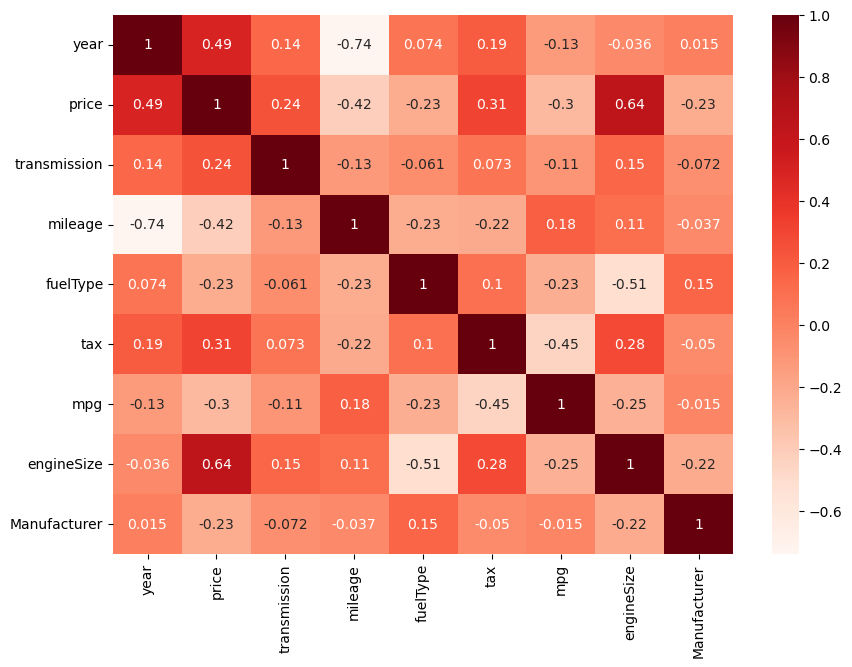

In [296]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap="Reds",cbar=True)
plt.show()

# Feature selection

In [297]:
X = data.drop(["model","year","price"],axis=1)
y = data["price"]

# Model selection

In [298]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state=100)

In [299]:
rfr = RandomForestRegressor(n_estimators=60,max_depth=15,random_state=10)
rfr.fit(x_train,y_train)
print("Training score :",rfr.score(x_train,y_train))
print("Test score",rfr.score(x_test,y_test))

Training score : 0.965757208516286
Test score 0.9300456427672106


# Best model random forest regressor with 96.57% and 93.00%

In [310]:
trans = float(input("Enter transmission type: "))
mileage = float(input("Enter mileage: "))
fueltype = float(input("Enter fueltype: "))
tax = float(input("Enter tax: "))
mpg = float(input("Enter mpg: "))
engsize = float(input("Enter enginesize: "))
manuf = float(input("Enter manufacturer: "))


d = {"transmission":[trans],
        "mileage":[mileage],
        "fuelType":[fueltype],
        "tax":[tax],
        "mpg":[mpg],
        "engineSize":[engsize],
        "Manufacturer":[manuf],}


df = pd.DataFrame(d)
car_price_prediction2 = rfr.predict(df)
print("\nPredicted car price: ",car_price_prediction2[0])

Enter transmission type: 1
Enter mileage: 2
Enter fueltype: 3
Enter tax: 4
Enter mpg: 5
Enter enginesize: 6
Enter manufacturer: 7

Predicted car price:  82358.23333333334
